<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>


## Image classification MCQ 
© ExploreAI Academy

The versatile machine learning techniques you have been learning will enable you to process complex and different data at a faster pace.  

So far you have performed classification on both tabular  ([iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)) and textual data ([the mbti dataset](https://www.kaggle.com/datasnaek/mbti-type)). In this notebook, you will apply the machine learning techniques you have learned for image classification. 

## Imports

Let's go ahead and load our libraries

In [1]:
import numpy as np
import gzip # This is used in extracting the images

import matplotlib.pyplot as plt # In order to plot the images to see what we are dealing with
from sklearn.ensemble import RandomForestClassifier # You'll be using Random Forest to classify the images
from sklearn.metrics import accuracy_score # Sklearn's way of measuring accuracy
from sklearn.metrics import classification_report 


# The data

The dataset we will be using is called `MNIST`. This is a large collection of hand-drawn digits `0 to 9` and is a good dataset to learn image classification on as it requires little to no preprocessing.

The dataset can be downloaded from [The MNIST Database](https://web.archive.org/web/20220331130319/https://yann.lecun.com/exdb/mnist/). Download all four files. These files are the images and their respective labels (normally, we're required to split the x (image data / characteristics) and y (labels) out during preprocessing, but this has already been done for us). The dataset has also already been split into a train and a test set.

Once you've downloaded the data, make sure that the data are in the same folder as this Jupyter notebook. If you've managed to do all that, we can now begin! 

By default, the MNIST files are compressed in the gzip format. The following two functions will extract the data for you. ** **Don't change this code.** **

In [2]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

## Challenge 1: Extracting the data

The MNIST dataset consists of 60,000 training images and 10,000 testing images. This is a lot of data! Let's not extract all of that right now. Create a function `get_data` that uses the above functions to extract a certain number of images and their labels from the gzip files.

The function will take as input two integer values, the number of train and test images to be extracted. Let's extract `5000` train images and `1000` test images. The function then returns four variables in the form of `(X_train, y_train), (X_test, y_test)`, where `(X_train, y_train)` are the extracted images and labels of the training set, and `(X-test, y_test)` are the extracted images and labels of the testing set. (Hint – you'll have to use the functions provided more than once.) 

Image pixel values range from 0 to 255. We need to normalise the image pixels so that they are in the range 0 to 1.

_**Function specifications:**_
* Should take two integers as input, one representing the number of training images and the other the number of testing images.
* Should return two `tuples` of the form `(X_train, y_train), (X_test, y_test)`.

_**Note**_ that the size of the MNIST images is 28x28.

Usually when setting up your dataset, it is a good idea to randomly shuffle your data in case your data are ordered. Think of this as shuffling a pack of cards. Here, however, we aren't going to shuffle the data so that all our answers are the same.

In [3]:
def get_data(num_train_images, num_test_images):
    IMAGE_WIDTH = 28
    X_train = extract_data('train-images-idx3-ubyte.gz', num_train_images, IMAGE_WIDTH)
    y_train = extract_labels('train-labels-idx1-ubyte.gz', num_train_images)
    X_test = extract_data('t10k-images-idx3-ubyte.gz', num_test_images, IMAGE_WIDTH)
    y_test = extract_labels('t10k-labels-idx1-ubyte.gz', num_test_images)
    
    X_train /= 255.0
    X_test /= 255.0
    
    return (X_train, y_train), (X_test, y_test)

In [4]:
(X_train, y_train), (X_test, y_test) = get_data(5000, 1000)

In [5]:
X_train.shape

(5000, 784)

In [6]:
X_test.shape

(1000, 784)

In [7]:
y_train.shape

(5000,)

In [8]:
y_test.shape

(1000,)

In [17]:
X_train[1, 349]

0.10980392

In [18]:
y_test[50]

6

## Plotting the data

Let's see what this data looks like! Right now the images are "flattened" into a 1-D array of length 784. In order to plot the image we first need to reshape it to the correct size of 28x28. We'll print out the respective label to make sure we are plotting the right number.

Label:  1


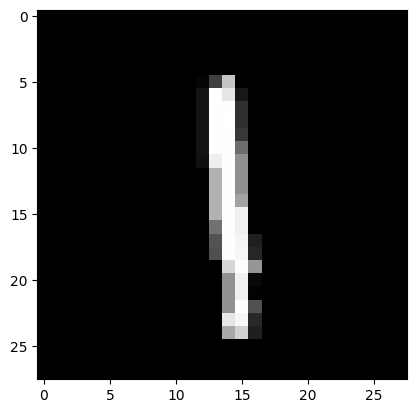

In [9]:
image_index = 8 ## Change me to view different images

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

## Challenge 2: Training the model

Now that we have formatted our data, we can fit a model using sklearn's `RandomForestClassifier` class with `20 estimators` and its `random_state` set to `42`. We'll write a function that will take as input the image and label variables that we created previously, and return a trained model.

_**Function specifications:**_
* Should take two NumPy `arrays` as input in the form `(X_train, y_train)`.
* Should return an sklearn `RandomForestClassifier` model which has a random state of 42 and number of estimators 20.
* The returned model should be fitted to the data.

In [10]:
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=20, random_state=42)
    model.fit(X_train, y_train)
    return model

In [11]:
clf = train_model(X_train, y_train)

## Challenge 3: Testing the model

Now that you have trained your model, let's see how well it does on the test set. Write a function which returns the accuracy of our trained model when tested with the test set.

_**Function specifications:**_
* Should take the fitted model `clf` and two NumPy arrays `X_test, y_test` as input.
* Should return a `float` of the accuracy of the model. This number should be between zero and one.

In [12]:
def calculate_accuracy(clf, X_test, y_test):
    accuracy = clf.score(X_test, y_test)
    return accuracy

In [13]:
print(calculate_accuracy(clf,X_test,y_test))

0.891


Classification reports give us more information on where our model is going wrong – looking specifically at the performance caused by Type I and II errors. Write a function that returns the classification report of your test set.

_**Function specifications:**_
* Should take the fitted model `clf` and two NumPy arrays `X_test, y_test` as input.
* Should return a classification report.

In [14]:
def get_class_report(clf, X_test, y_test):
    report = classification_report(y_test, clf.predict(X_test))
    return report

In [15]:
print(get_class_report(clf,X_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.98      0.98       126
           2       0.88      0.90      0.89       116
           3       0.84      0.83      0.84       107
           4       0.86      0.90      0.88       110
           5       0.86      0.85      0.86        87
           6       0.91      0.93      0.92        87
           7       0.88      0.85      0.87        99
           8       0.93      0.78      0.85        89
           9       0.81      0.88      0.85        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



## Plotting the results

Let's actually see if our model has trained correctly. To do so, plot some of the images with their predicted labels. Since we don't have the predictions stored in our notebook's memory, we need to call the predict function here first.

Predicted Label:  7


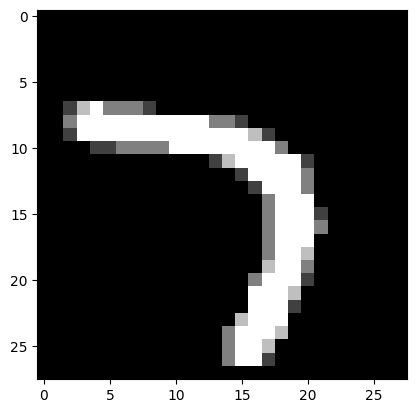

In [19]:
preds = clf.predict(X_test)

image_index = 60 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()

Since we didn't use all the data in the beginning, there is a chance our performance can improve. Go change the amount of data we use to see how it affects the accuracy of your model.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>